In [1]:
import pandas as pd
df=pd.read_csv("Bengaluru_House_Data.csv")
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [3]:
df.drop(['society','availability'],inplace=True,axis=1)

In [4]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [5]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   location    13319 non-null  object 
 2   size        13304 non-null  object 
 3   total_sqft  13320 non-null  object 
 4   bath        13247 non-null  float64
 5   balcony     12711 non-null  float64
 6   price       13320 non-null  float64
dtypes: float64(3), object(4)
memory usage: 728.6+ KB


In [7]:
df.describe(include='O')

,area_type,location,size,total_sqft
count,13320,13319,13304,13320
unique,4,1305,31,2117
top,Super built-up Area,Whitefield,2 BHK,1200
freq,8790,540,5199,843


In [8]:
df.dropna(axis=0,inplace=True)

In [9]:
df.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [10]:
df['BHK']=df['size'].apply(lambda x: int(x.split(' ')[0]))

In [11]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [12]:
df.drop(["size"],axis=1,inplace=True)

<Axes: ylabel='BHK'>

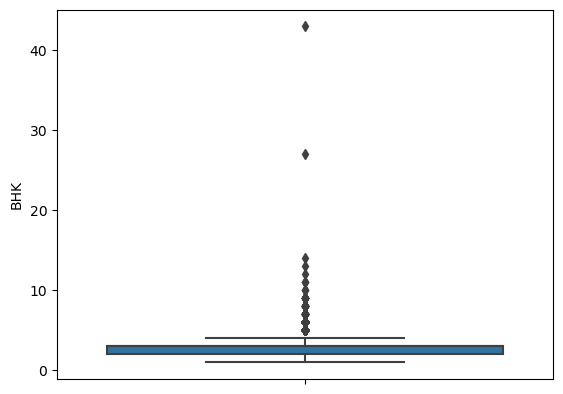

In [13]:
import seaborn as sns
import matplotlib as plt
sns.boxplot(y='BHK', data=df)

In [14]:
def remove_outliers(col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    upper_lim=Q3+1.5*IQR
    lower_lim=Q1-1.5*IQR
    filter_data=df[ (df[col] >= lower_lim) & (df[col] <= upper_lim) ]
    return filter_data

In [15]:
df=remove_outliers('BHK')

<Axes: ylabel='BHK'>

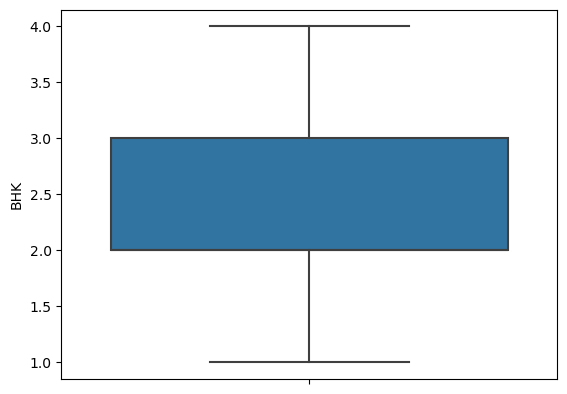

In [16]:
sns.boxplot(y='BHK', data=df)

In [17]:
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

<Axes: ylabel='total_sqft'>

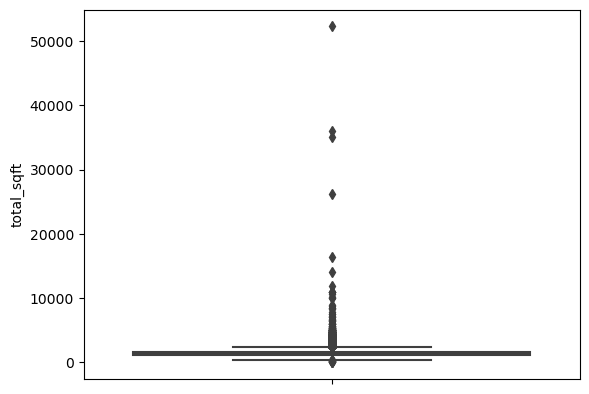

In [18]:
sns.boxplot(y='total_sqft', data=df)

In [19]:
df=remove_outliers('total_sqft')

<Axes: ylabel='total_sqft'>

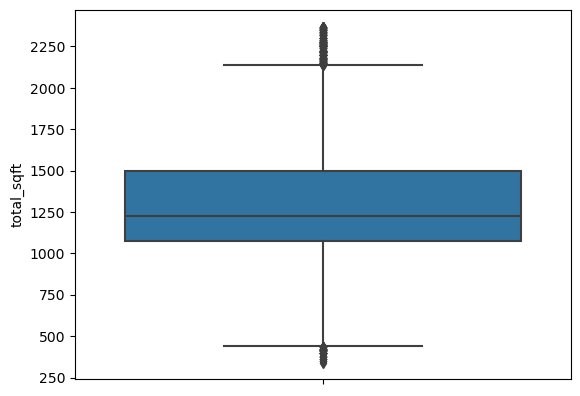

In [20]:
sns.boxplot(y='total_sqft', data=df)

In [21]:
df=remove_outliers('total_sqft')

<Axes: ylabel='total_sqft'>

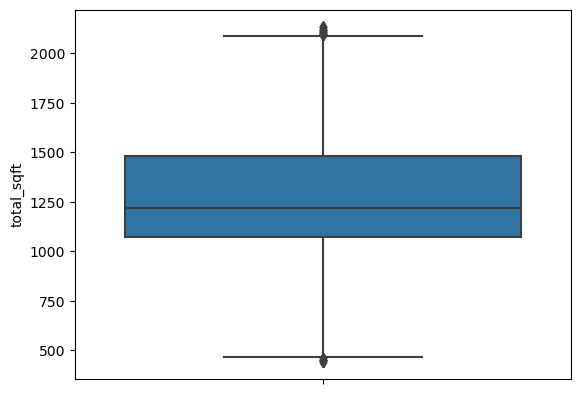

In [22]:
sns.boxplot(y='total_sqft', data=df)

<Axes: ylabel='bath'>

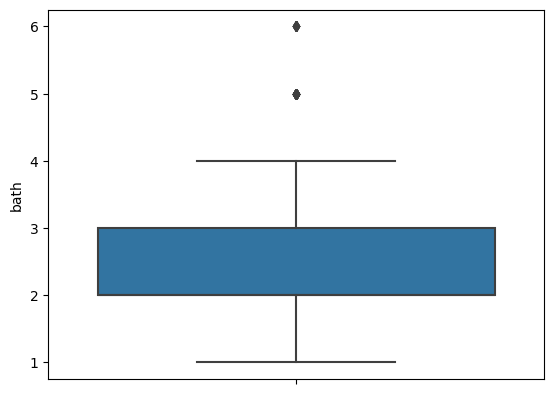

In [23]:
sns.boxplot(y='bath', data=df)

In [24]:
df=remove_outliers('bath')

<Axes: ylabel='bath'>

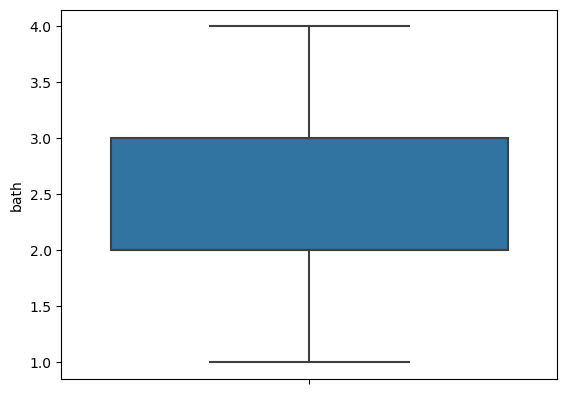

In [25]:
sns.boxplot(y='bath', data=df)

C:\Users\meena\anaconda3\envs\deeplearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area_type', ylabel='Count'>

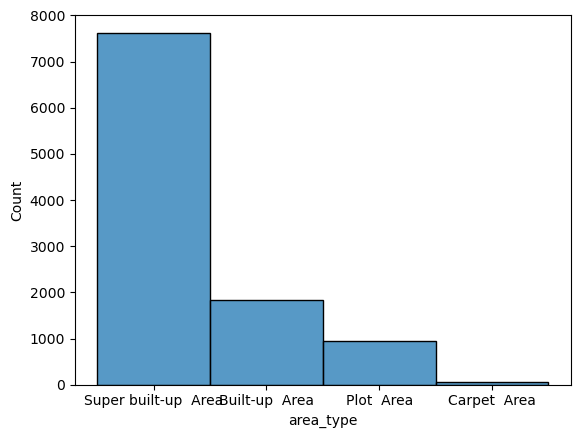

In [26]:
sns.histplot(x='area_type',data=df)


In [27]:
df.head()

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2
5,Super built-up Area,Whitefield,1170.0,2.0,1.0,38.00,2


<Axes: xlabel='total_sqft', ylabel='price'>

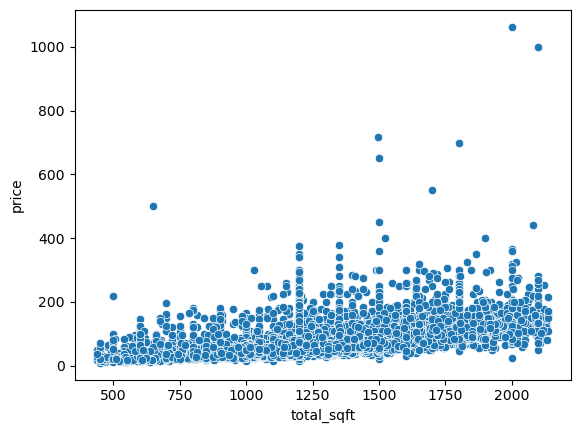

In [28]:
sns.scatterplot(x="total_sqft",y="price",data=df)

In [29]:
df1=pd.get_dummies(df,drop_first=True)

In [30]:
df1.head()

,total_sqft,bath,balcony,price,BHK,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_ Basavangudi,location_ Devarabeesana Halli,...,location_manyata tech park,location_mvj engineering college,location_poornaprajna layout,"location_ravindra nagar, T.dasarahalli peenya",location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_singapura paradise,location_tc.palya,location_whitefiled
0,1056.0,2.0,1.0,39.07,2,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,3.0,62.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,1.0,95.00,3,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1200.0,2.0,1.0,51.00,2,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1170.0,2.0,1.0,38.00,2,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
df1.shape


(10491, 1105)

In [32]:
x=df1.drop(['price'],axis=1)
y=df1['price'].values

In [33]:
y.shape

(10491,)

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_dev,y_train,y_dev=train_test_split(x,y,test_size=0.4,random_state=42)
x_test,x_val,y_test,y_val=train_test_split(x_dev,y_dev,test_size=0.5)

In [35]:
x_train.shape[1]

1104

In [36]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
y_train.shape

(6294, 1)

In [70]:
import tensorflow as tf
input=tf.keras.layers.Input(shape=(x_train.shape[1],))
dense_1=tf.keras.layers.Dense(64,activation="relu")(input)
drop_out_1=tf.keras.layers.Dropout(0.8)(dense_1)
dense_2=tf.keras.layers.Dense(32,activation="relu")(drop_out_1)
drop_out_2=tf.keras.layers.Dropout(0.5)(dense_2)
output=tf.keras.layers.Dense(1,activation="relu")(drop_out_2)
model=tf.keras.models.Model(inputs=input,outputs=output)
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1104)]            0         
                                                                 
 dense_23 (Dense)            (None, 64)                70720     
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dropout_14 (Dropout)        (None, 32)                0         
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 72,833
Trainable params: 72,833
Non-trainable

In [71]:
model.compile(loss='mse',optimizer=tf.optimizers.Adam(),metrics=['mae'])

In [72]:
x_train = x_train.astype(float)
y_train = y_train.astype(float)
x_val = x_val.astype(float)
y_val = y_val.astype(float)
x_test=x_test.astype(float)
y_test=y_test.astype(float)

In [73]:
history=model.fit(x_train,y_train,epochs=150,validation_data=(x_val,y_val))

Epoch 1/150
197/197 [==============================] - 1s 5ms/step - loss: 5730.6802 - mae: 58.3226 - val_loss: 3558.5520 - val_mae: 40.4955
Epoch 2/150
197/197 [==============================] - 1s 4ms/step - loss: 3449.5488 - mae: 40.5563 - val_loss: 3537.7327 - val_mae: 40.2574
Epoch 3/150
197/197 [==============================] - 1s 4ms/step - loss: 3049.5056 - mae: 37.6522 - val_loss: 3255.2498 - val_mae: 37.1686
Epoch 4/150
197/197 [==============================] - 1s 4ms/step - loss: 2836.4844 - mae: 35.9191 - val_loss: 3848.5540 - val_mae: 43.5422
Epoch 5/150
197/197 [==============================] - 1s 4ms/step - loss: 2824.8809 - mae: 35.4441 - val_loss: 3860.2573 - val_mae: 43.6537
Epoch 6/150
197/197 [==============================] - 1s 3ms/step - loss: 2774.4333 - mae: 35.4851 - val_loss: 3770.3438 - val_mae: 42.7053
Epoch 7/150
197/197 [==============================] - 1s 4ms/step - loss: 2745.3564 - mae: 34.4686 - val_loss: 3832.8025 - val_mae: 43.3225
Epoch 8/150
1

In [74]:
model.evaluate(x_test,y_test)

66/66 [==============================] - 0s 3ms/step - loss: 1954.3513 - mae: 30.0061


[1954.351318359375, 30.006113052368164]

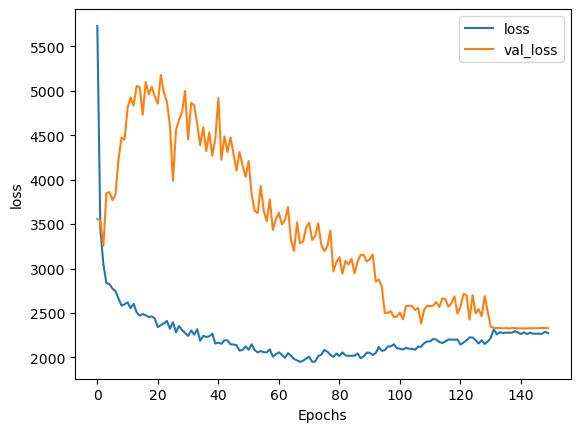

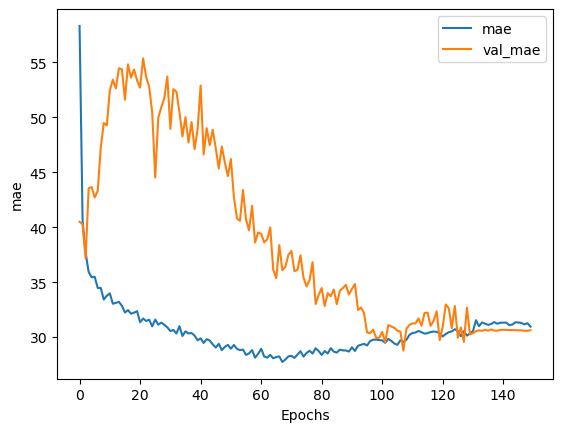

In [75]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
plot_graphs(history,'loss')
plot_graphs(history,'mae')